# Ploting all T_max with all ratios
In this notebook, we extract the data for all T_max of Cv for each ratio at same p and plot as funtion of nv

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from src.isingchat import style
from src.isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


p = 1.0


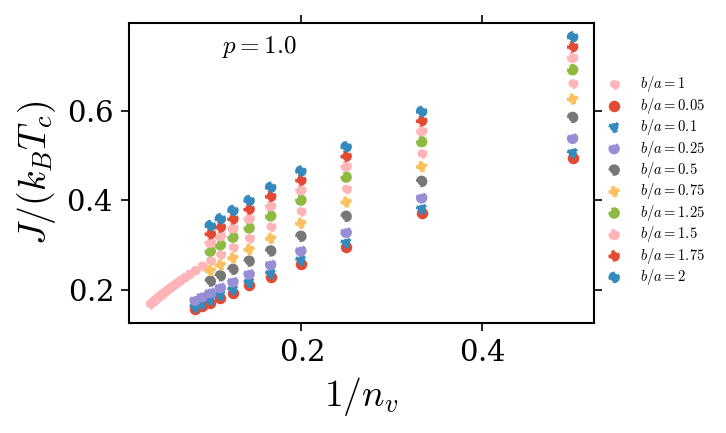

p = 1.1


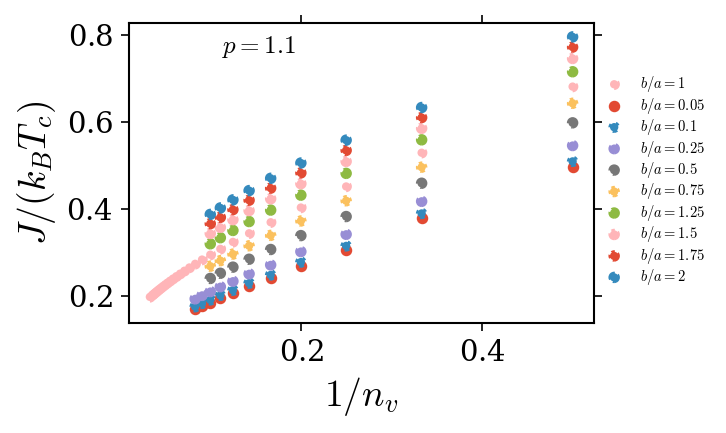

p = 1.5


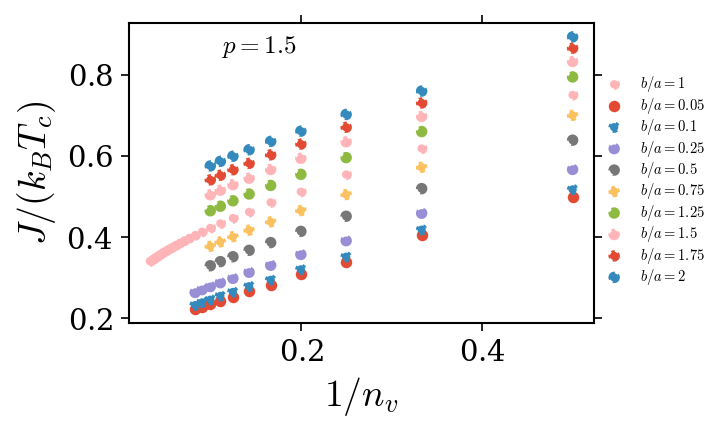

p = 1.9


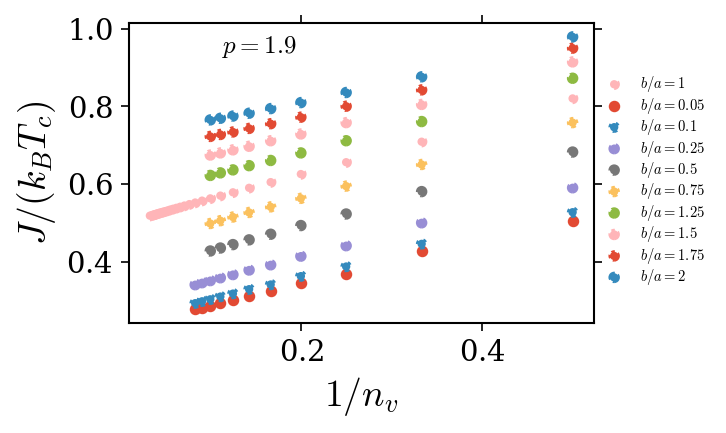

p = 2.0


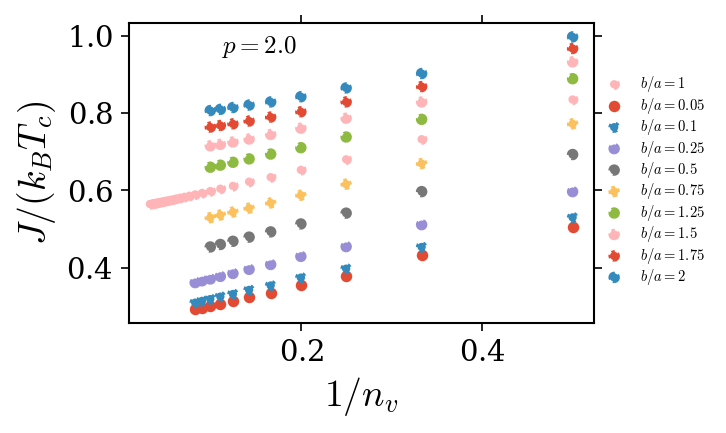

In [26]:
# Markers for plots
markers = ["o",
           "v",
           "s",
           "P",
           "p",
           "*",
           "h",
           "D",
           "X",
           "8",
           "d"]
# style lines
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

use_tex = False

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex
    
list_exp_p = [1.0,1.1,1.5,1.9,2.0]
ratios = [0.05,0.1,0.25,0.5,0.75,1.25,1.5,1.75,2]
lists_nv = [2,3,4,5,6,7,8,9,10,11,12]
DATA_PATH = os.path.join(os.environ['VIRTUAL_ENV'],"data\\imperfect\\infinite-size\\unitcell_2")
file_regular = os.path.join(os.environ['VIRTUAL_ENV'],"data\\regular\\infinite-size\\regular_all_inv_Tc.csv")
df_regular = pd.read_csv(file_regular).dropna()

for exp_p in list_exp_p:
    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    print("p = {}".format(exp_p))
    ax.scatter(df_regular["1/nv"].values,df_regular["P{}".format(exp_p)].values,
                                 lw=1.5,linestyle=line_styles[13],color='C'+str(13), label = '$b/a=1$')
    for index,ratio in enumerate(ratios):
        df = pd.read_csv(os.path.join(DATA_PATH,'ratio_{}\\unitcell-2_ratio-{}_all_inv_Tmax.csv'.format(ratio,ratio)))
        ax.scatter(df["1/nv"].values, df["P{}".format(exp_p)].values,
                   lw=1.5,linestyle=line_styles[index],color='C'+str(index), label = '$b/a={}$'.format(ratio))
    # labels configurations
    ax.xaxis.label.set_size(18)
    ax.set_xlabel(r"$1/n_v$")

    ax.yaxis.label.set_size(18)
    ax.set_ylabel(r"$J/(k_BT_c)$")
    # ax.axvline(x=1,linestyle='--')

    # ax.set_ylim(0,1)
    # ax.set_xlim(1, 2)                            

    ax.legend(
              loc =(1,0.1),
              fontsize = 7,
              labelspacing = 0.1,
              frameon=False
    )
    ax.text(0.2,0.9,'$p={}$'.format(exp_p),
            fontsize = 12,
            transform=ax.transAxes
    )

    pyplot.draw()
    pyplot.show()